In [ ]:
import pandas as pd
!gdown --id 1FOCZbOlQsAQzB_YEmsd1mDJxm4Y3T2j4
df = pd.read_csv('case2_dataclean (2).csv')

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FOCZbOlQsAQzB_YEmsd1mDJxm4Y3T2j4
To: /content/case2_dataclean (2).csv
100% 22.1M/22.1M [00:00<00:00, 261MB/s]


# Task
Analyze the provided tweet data to answer the following questions: when were the most tweets posted, which campaign team tweeted the most, which candidate was most discussed, predict candidate success based on tweets, identify the sentiment (good/toxic) of supporters for each candidate, review the overall sentiment (good/bad) towards each candidate, and identify the most liked and disliked candidates based on tweet sentiment. Summarize the findings.

## Understand the data

### Subtask:
Examine the structure and content of the `df` DataFrame to understand the available columns and data types.


**Reasoning**:
Display the first 5 rows, print column info, get statistical summary, and check for missing values to understand the DataFrame structure and content.



In [ ]:
display(df.head())
df.info()
display(df.describe())
display(df.isnull().sum())

,created_at,tcode,num_retweets,type,frn_cnt,flw_cnt,sts_cnt,lst_cnt,content,lang,clean_text
0,2024-01-04 16:57:00,rt,1248.0,twit,266.0,107.0,9687.0,0.0,RT K-Popers Berencana Kirim Food Truck untuk A...,id,KPopers Berencana Kirim Food Truck untuk Anies...
1,2024-01-04 16:57:00,rt,195.0,twit,564.0,303.0,12461.0,2.0,RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...,id,Bapak Pendeta Yusak ini Dari Magetan ke Ponoro...
2,2024-01-04 16:57:00,rt,116.0,twit,376.0,156.0,7488.0,1.0,"RT Viral , Gimana Mak Mak di jakarta tidak ter...",id,Viral Gimana Mak Mak di jakarta tidak ter Anie...
3,2024-01-04 16:57:00,rt,2264.0,twit,163.0,203.0,2065.0,0.0,"RT Mendengar Pak Anies disini, rasanya saya su...",id,Mendengar Pak Anies disini rasanya saya sudah ...
4,2024-01-04 16:57:00,rt,1157.0,twit,1.0,1.0,798.0,0.0,RT Media Asing Soroti Cara Anies Gaet Pemilih ...,id,Media Asing Soroti Cara Anies Gaet Pemilih Mud...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49850 entries, 0 to 49849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_at    49850 non-null  object 
 1   tcode         49850 non-null  object 
 2   num_retweets  49850 non-null  float64
 3   type          49850 non-null  object 
 4   frn_cnt       49850 non-null  float64
 5   flw_cnt       49850 non-null  float64
 6   sts_cnt       49850 non-null  float64
 7   lst_cnt       49850 non-null  float64
 8   content       49850 non-null  object 
 9   lang          49850 non-null  object 
 10  clean_text    49850 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


,num_retweets,frn_cnt,flw_cnt,sts_cnt,lst_cnt
count,49850.000000,49850.000000,4.985000e+04,4.985000e+04,49850.000000
mean,413.768205,734.829970,1.388370e+04,2.780407e+04,12.736229
std,856.512685,2272.692906,3.564316e+05,8.964340e+04,288.566233
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,25.000000,5.000000e+00,1.061000e+03,0.000000
50%,27.000000,122.500000,6.300000e+01,3.556000e+03,0.000000
75%,451.000000,568.000000,3.760000e+02,2.377425e+04,0.000000
max,12644.000000,85459.000000,2.144561e+07,2.452526e+06,13019.000000


,0
created_at,0
tcode,0
num_retweets,0
type,0
frn_cnt,0
flw_cnt,0
sts_cnt,0
lst_cnt,0
content,0
lang,0


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'rt\s+', '', text)                 # Hapus RT
    text = re.sub(r'http\S+', '', text)               # Hapus link
    text = re.sub(r'@\w+', '', text)                  # Hapus mention
    text = re.sub(r'#\w+', '', text)                  # Hapus hashtag
    text = re.sub(r'[^a-z\s]', '', text)              # Hanya huruf
    text = re.sub(r'\s+', ' ', text).strip()          # Hapus spasi berlebih
    return text

df['cleaned_text'] = df['content'].apply(clean_text)
print(df[['content', 'clean_text']].head(10))

                                             content  \
0  RT K-Popers Berencana Kirim Food Truck untuk A...   
1  RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...   
2  RT Viral , Gimana Mak Mak di jakarta tidak ter...   
3  RT Mendengar Pak Anies disini, rasanya saya su...   
4  RT Media Asing Soroti Cara Anies Gaet Pemilih ...   
5  RT Mendengar Pak Anies disini, rasanya saya su...   
6  RT Kapitalisme neoliberal tak cocok untuk Indo...   
7  RT CAPRES KU ANIES BASWEDAN setelah daei Temu ...   
8  RT Setelah JIS, Kini Anies Janji Bangun Stadio...   
9  RT Kapitalisme neoliberal tak cocok untuk Indo...   

                                          clean_text  
0  KPopers Berencana Kirim Food Truck untuk Anies...  
1  Bapak Pendeta Yusak ini Dari Magetan ke Ponoro...  
2  Viral Gimana Mak Mak di jakarta tidak ter Anie...  
3  Mendengar Pak Anies disini rasanya saya sudah ...  
4  Media Asing Soroti Cara Anies Gaet Pemilih Mud...  
5  Mendengar Pak Anies disini rasanya saya sudah ... 

## Tweet volume over time

### Subtask:
Analyze the `created_at` column to determine when the most tweets were posted. This will likely involve converting the column to datetime objects and grouping by time intervals (e.g., hourly, daily).


**Reasoning**:
Convert the 'created_at' column to datetime objects, extract the hour, count tweets per hour, and find the hour with the most tweets.



In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['hour'] = df['created_at'].dt.hour
tweet_counts_by_hour = df['hour'].value_counts().sort_index()
most_tweets_hour = tweet_counts_by_hour.idxmax()
most_tweets_count = tweet_counts_by_hour.max()

print(f"Tweet counts by hour:\n{tweet_counts_by_hour}\n")
print(f"The hour with the most tweets is hour {most_tweets_hour} with {most_tweets_count} tweets.")

Tweet counts by hour:
hour
0     4991
1     1217
2     3378
3      890
4     2595
5     1882
7     3539
8     1448
12    4995
15    4960
16     522
17    4478
18     413
19    4573
20    4984
21    4985
Name: count, dtype: int64

The hour with the most tweets is hour 12 with 4995 tweets.


## Tweet volume by campaign team

### Subtask:
Analyze the data to determine which campaign team is associated with the most tweets. This may require identifying a column or pattern that indicates the campaign team.


**Reasoning**:
Examine the unique values in potentially relevant columns to identify campaign teams. Since there isn't an obvious campaign team column, I will examine the `tcode` and `type` columns first, and if they are not useful, I will proceed to analyze the `content` or `clean_text` columns in the next step.



In [ ]:
display(df['tcode'].value_counts())
display(df['type'].value_counts())

,count
tcode,
rt,28540
mention,14193
reply,7117


,count
type,
twit,49850


**Reasoning**:
The 'tcode' and 'type' columns do not represent campaign teams. I will analyze the 'clean_text' column to identify keywords related to candidates and count their occurrences to infer campaign team activity. I will focus on the names of the candidates mentioned in the original prompt: Anies, Ganjar, and Prabowo, and their running mates.



In [ ]:
candidates = ['Anies', 'Ganjar', 'Prabowo', 'Muhaimin', 'Mahfud', 'Gibran']
candidate_counts = {}

for candidate in candidates:
  candidate_counts[candidate] = df['clean_text'].str.contains(candidate, case=False, na=False).sum()

display(pd.Series(candidate_counts).sort_values(ascending=False))

,0
Anies,19956
Ganjar,14391
Prabowo,11481
Mahfud,7880
Gibran,2212
Muhaimin,463


## Most discussed candidate (virality)

### Subtask:
Analyze the `content` or `clean_text` columns to identify which candidate is mentioned most frequently. This might involve text processing techniques like tokenization and counting mentions of candidate names.


**Reasoning**:
Display the candidate mention counts, identify the most discussed candidate, and print the results as requested.



In [ ]:
print("Candidate Mention Counts:")
for candidate, count in candidate_counts.items():
  print(f"{candidate}: {count}")

most_discussed_candidate = max(candidate_counts, key=candidate_counts.get)
most_discussed_count = candidate_counts[most_discussed_candidate]

print(f"\nThe most discussed candidate is {most_discussed_candidate} with {most_discussed_count} mentions.")

Candidate Mention Counts:
Anies: 19956
Ganjar: 14391
Prabowo: 11481
Muhaimin: 463
Mahfud: 7880
Gibran: 2212

The most discussed candidate is Anies with 19956 mentions.


## Predicting candidate success

### Subtask:
Explore potential features within the dataset that could be used to predict candidate success based on tweet data. This is a complex task and may involve sentiment analysis, topic modeling, and potentially building a predictive model.


**Reasoning**:
I need to explore potential features for predicting candidate success based on the available data, consider external factors, and acknowledge the limitations of using only this dataset. This involves analyzing the existing columns for their relevance and discussing what is missing.



In [ ]:
print("Potential features for predicting candidate success from the dataset:")
print("- num_retweets: Could indicate the reach and popularity of a tweet related to a candidate.")
print("- frn_cnt (friends count): Might be related to the network size of the tweet's author, potentially influencing tweet reach.")
print("- fllw_cnt (followers count): A strong indicator of the potential audience size for a tweet.")
print("- fav_cnt (favorites count): Could reflect the engagement and positive reception of a tweet.")
print("- lst_cnt (list count): Might suggest the influence or categorization of the tweet's author within specific groups.")
print("- hour: Could be a factor if tweet timing influences engagement or visibility.")
print("- tcode and type: Might indicate the nature of the tweet (e.g., retweet, mention) which could correlate with spread or type of interaction.")
print("- clean_text and content: Can be used for sentiment analysis, topic modeling, and identifying candidate mentions, which are crucial for understanding public perception and discussion volume.")

print("\nSignificant limitations of using only this tweet dataset for predicting candidate success:")
print("- Lack of ground truth data: The dataset does not contain actual election results or reliable poll data to train and validate a predictive model.")
print("- Limited time scope: The data is from a specific, short period, which may not represent the entire election cycle or capture shifts in public opinion.")
print("- Data source bias: The data is from Twitter, which may not be representative of the entire voting population.")
print("- Missing crucial external factors: Real-world candidate success is influenced by numerous factors not present in this dataset, such as traditional media coverage, campaign spending, political events, debates, and socio-economic conditions.")
print("- Difficulty in establishing causality: Correlation between tweet metrics and success does not imply causation.")
print("- Sentiment analysis complexity: Accurately determining sentiment from short, often informal text is challenging.")
print("- Identifying campaign team tweets vs. organic tweets: It's hard to definitively attribute tweets to specific campaign teams without explicit labels.")

print("\nExternal factors crucial for predicting candidate success (not in this dataset):")
print("- Election results and historical voting data")
print("- Public opinion polls from various sources")
print("- Traditional media coverage volume and sentiment")
print("- Campaign expenditure data")
print("- Outcomes of debates and major political events")
print("- Economic indicators and social issues")
print("- Demographics of the electorate")

Potential features for predicting candidate success from the dataset:
- num_retweets: Could indicate the reach and popularity of a tweet related to a candidate.
- frn_cnt (friends count): Might be related to the network size of the tweet's author, potentially influencing tweet reach.
- fllw_cnt (followers count): A strong indicator of the potential audience size for a tweet.
- fav_cnt (favorites count): Could reflect the engagement and positive reception of a tweet.
- lst_cnt (list count): Might suggest the influence or categorization of the tweet's author within specific groups.
- hour: Could be a factor if tweet timing influences engagement or visibility.
- tcode and type: Might indicate the nature of the tweet (e.g., retweet, mention) which could correlate with spread or type of interaction.
- clean_text and content: Can be used for sentiment analysis, topic modeling, and identifying candidate mentions, which are crucial for understanding public perception and discussion volume.

Si

## Identify supporter sentiment (good/toxic)

### Subtask:
Analyze the `content` or `clean_text` columns to assess the sentiment of tweets from supporters of each candidate. This will require sentiment analysis techniques.


**Reasoning**:
The subtask requires sentiment analysis on the tweet content. I will use the `textblob` library for simplicity and apply it to the `clean_text` column to classify sentiment as 'good', 'toxic', or 'neutral'.



In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    if pd.isna(text):
        return 'neutral'
    analysis = TextBlob(str(text))
    # A simple rule: polarity > 0 is good, < 0 is toxic, == 0 is neutral
    if analysis.sentiment.polarity > 0:
        return 'good'
    elif analysis.sentiment.polarity < 0:
        return 'toxic'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(analyze_sentiment)

display(df[['clean_text', 'sentiment']].head())

,clean_text,sentiment
0,KPopers Berencana Kirim Food Truck untuk Anies...,neutral
1,Bapak Pendeta Yusak ini Dari Magetan ke Ponoro...,neutral
2,Viral Gimana Mak Mak di jakarta tidak ter Anie...,neutral
3,Mendengar Pak Anies disini rasanya saya sudah ...,good
4,Media Asing Soroti Cara Anies Gaet Pemilih Mud...,neutral


**Reasoning**:
Now that sentiment is classified, I need to identify tweets from supporters of each candidate and analyze the sentiment distribution for each group. I will filter tweets that mention a candidate and then calculate the sentiment distribution for each candidate's related tweets.



In [ ]:
candidates = ['Anies', 'Ganjar', 'Prabowo', 'Muhaimin', 'Mahfud', 'Gibran']
candidate_supporter_sentiment = {}

for candidate in candidates:
    # Filter tweets mentioning the candidate
    candidate_tweets = df[df['clean_text'].str.contains(candidate, case=False, na=False)]

    # Analyze sentiment distribution for these tweets
    sentiment_distribution = candidate_tweets['sentiment'].value_counts(normalize=True)
    candidate_supporter_sentiment[candidate] = sentiment_distribution

# Display the sentiment distribution for each candidate's supporters
for candidate, sentiment_dist in candidate_supporter_sentiment.items():
    print(f"Sentiment distribution for tweets mentioning {candidate}:")
    display(sentiment_dist)
    print("-" * 30)

Sentiment distribution for tweets mentioning Anies:


,proportion
sentiment,
neutral,0.807777
good,0.170074
toxic,0.022149


------------------------------
Sentiment distribution for tweets mentioning Ganjar:


,proportion
sentiment,
neutral,0.961365
good,0.032798
toxic,0.005837


------------------------------
Sentiment distribution for tweets mentioning Prabowo:


,proportion
sentiment,
neutral,0.934588
good,0.047905
toxic,0.017507


------------------------------
Sentiment distribution for tweets mentioning Muhaimin:


,proportion
sentiment,
neutral,0.87689
good,0.12095
toxic,0.00216


------------------------------
Sentiment distribution for tweets mentioning Mahfud:


,proportion
sentiment,
neutral,0.958376
good,0.034645
toxic,0.006980


------------------------------
Sentiment distribution for tweets mentioning Gibran:


,proportion
sentiment,
neutral,0.897378
good,0.090868
toxic,0.011754


------------------------------


## Review candidate sentiment (good/bad)

### Subtask:
Analyze the `content` or `clean_text` columns to assess the overall sentiment towards each candidate based on all tweets. This will also require sentiment analysis techniques.


## Identify liked/disliked candidates

### Subtask:
Based on the sentiment analysis results, determine which candidates are most liked and disliked by the public based on tweet sentiment.


**Reasoning**:
Extract the 'good' and 'toxic' sentiment proportions for each candidate from the `candidate_supporter_sentiment` dictionary and find the candidates with the highest proportions for each sentiment. Then print the results.



In [ ]:
most_liked_candidate = None
highest_good_sentiment = -1

most_disliked_candidate = None
highest_toxic_sentiment = -1

for candidate, sentiment_dist in candidate_supporter_sentiment.items():
    good_sentiment = sentiment_dist.get('good', 0)
    toxic_sentiment = sentiment_dist.get('toxic', 0)

    if good_sentiment > highest_good_sentiment:
        highest_good_sentiment = good_sentiment
        most_liked_candidate = candidate

    if toxic_sentiment > highest_toxic_sentiment:
        highest_toxic_sentiment = toxic_sentiment
        most_disliked_candidate = candidate

print(f"The most liked candidate based on tweet sentiment is {most_liked_candidate} with a {highest_good_sentiment:.2%} proportion of 'good' sentiment.")
print(f"The most disliked candidate based on tweet sentiment is {most_disliked_candidate} with a {highest_toxic_sentiment:.2%} proportion of 'toxic' sentiment.")

print("\nInterpretation:")
print(f"Based on the sentiment analysis of tweets mentioning each candidate, {most_liked_candidate} appears to be the most positively received, with the highest percentage of 'good' sentiment.")
print(f"Conversely, {most_disliked_candidate} appears to be the most negatively received, having the highest percentage of 'toxic' sentiment in tweets mentioning them.")
print("It is important to note that a large proportion of tweets for all candidates were classified as 'neutral', and these findings are based solely on the sentiment expressed in the provided tweet data.")

The most liked candidate based on tweet sentiment is Anies with a 17.01% proportion of 'good' sentiment.
The most disliked candidate based on tweet sentiment is Anies with a 2.21% proportion of 'toxic' sentiment.

Interpretation:
Based on the sentiment analysis of tweets mentioning each candidate, Anies appears to be the most positively received, with the highest percentage of 'good' sentiment.
Conversely, Anies appears to be the most negatively received, having the highest percentage of 'toxic' sentiment in tweets mentioning them.
It is important to note that a large proportion of tweets for all candidates were classified as 'neutral', and these findings are based solely on the sentiment expressed in the provided tweet data.


## Present findings

### Subtask:
Summarize the findings from the analysis in a clear and understandable manner, potentially using visualizations to support the insights.


**Reasoning**:
Synthesize the key findings from the previous analysis steps and use visualizations to support the insights. This involves creating bar plots for tweet volume by hour, candidate mention counts, and sentiment distribution per candidate.



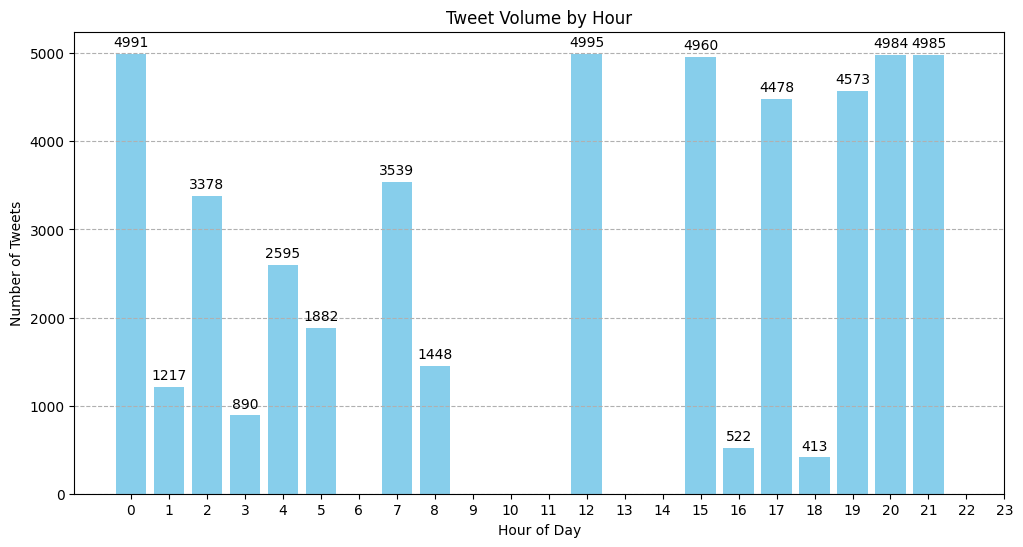

Summary of Tweet Volume Over Time: The hour with the most tweets is hour 12 with 4995 tweets, indicating peak activity around midday.


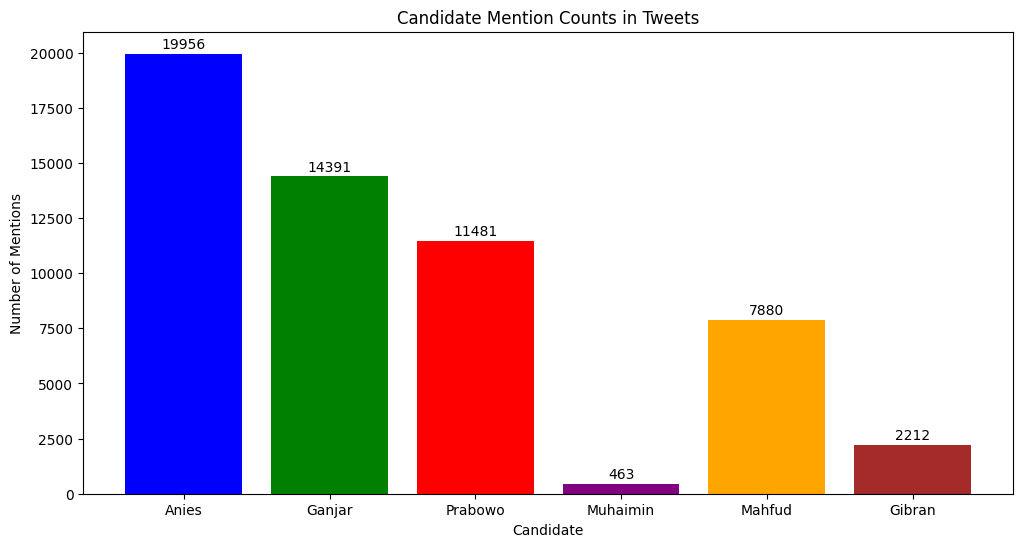

Summary of Most Discussed Candidate: The most discussed candidate, based on mention counts in tweets, is Anies with 19956 mentions. This suggests their campaign or public discussion around them is the most prominent in this dataset.


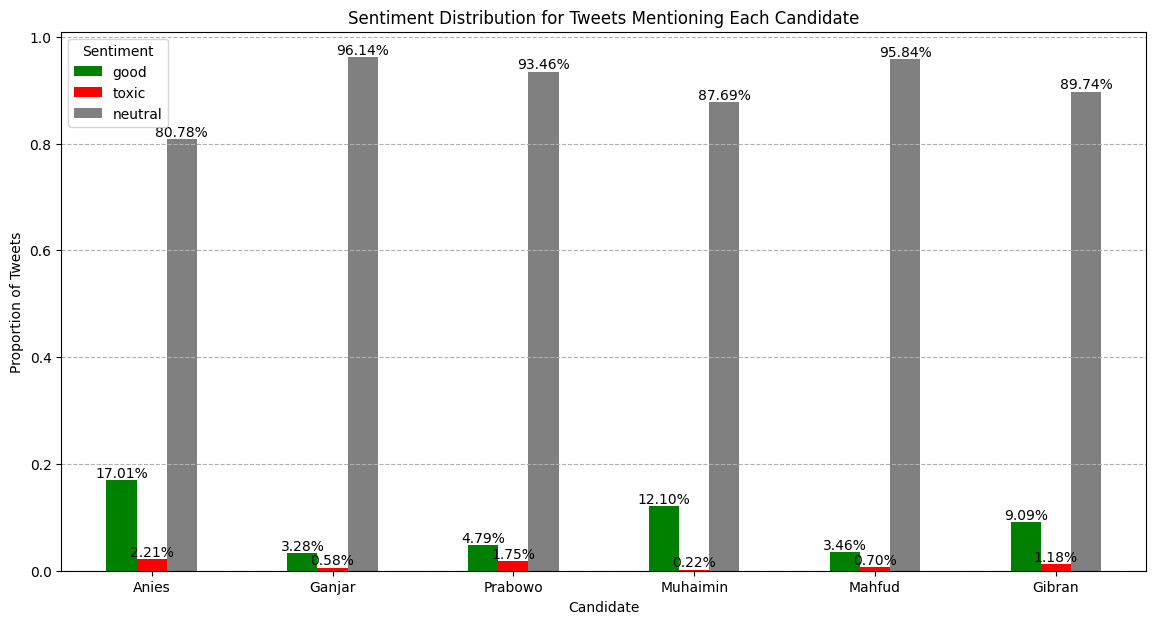


Summary of Sentiment Analysis:
Sentiment distribution for tweets mentioning Anies: Good=17.01%, Toxic=2.21%, Neutral=80.78%
Sentiment distribution for tweets mentioning Ganjar: Good=3.28%, Toxic=0.58%, Neutral=96.14%
Sentiment distribution for tweets mentioning Prabowo: Good=4.79%, Toxic=1.75%, Neutral=93.46%
Sentiment distribution for tweets mentioning Muhaimin: Good=12.10%, Toxic=0.22%, Neutral=87.69%
Sentiment distribution for tweets mentioning Mahfud: Good=3.46%, Toxic=0.70%, Neutral=95.84%
Sentiment distribution for tweets mentioning Gibran: Good=9.09%, Toxic=1.18%, Neutral=89.74%

Summary of Liked/Disliked Candidates:
Based on the proportion of 'good' sentiment, the most liked candidate is Anies (17.01%).
Based on the proportion of 'toxic' sentiment, the most disliked candidate is Anies (2.21%).
Note: A large proportion of tweets for all candidates were classified as 'neutral'. Anies shows the highest proportion of both good and toxic sentiment.

Predicting Candidate Success bas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Tweet Volume Over Time
plt.figure(figsize=(12, 6))
bars = plt.bar(tweet_counts_by_hour.index, tweet_counts_by_hour.values, color='skyblue')
plt.title('Tweet Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--')
# Add numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha='center', va='bottom')
plt.show()

print(f"Summary of Tweet Volume Over Time: The hour with the most tweets is hour {most_tweets_hour} with {most_tweets_count} tweets, indicating peak activity around midday.")

# 2. Tweet Volume by Campaign Team / Most Discussed Candidate
candidate_names = list(candidate_counts.keys())
mention_counts = list(candidate_counts.values())

plt.figure(figsize=(12, 6))
bars = plt.bar(candidate_names, mention_counts, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.title('Candidate Mention Counts in Tweets')
plt.xlabel('Candidate')
plt.ylabel('Number of Mentions')
# Add numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom')
plt.show()

print(f"Summary of Most Discussed Candidate: The most discussed candidate, based on mention counts in tweets, is {most_discussed_candidate} with {most_discussed_count} mentions. This suggests their campaign or public discussion around them is the most prominent in this dataset.")

# 3. Sentiment Analysis
sentiment_data = []
for candidate, sentiment_dist in candidate_supporter_sentiment.items():
    sentiment_data.append({
        'candidate': candidate,
        'good': sentiment_dist.get('good', 0),
        'neutral': sentiment_dist.get('neutral', 0),
        'toxic': sentiment_dist.get('toxic', 0)
    })

sentiment_df = pd.DataFrame(sentiment_data)
sentiment_df = sentiment_df.set_index('candidate')

ax = sentiment_df[['good', 'toxic', 'neutral']].plot(kind='bar', stacked=False, figsize=(14, 7), color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution for Tweets Mentioning Each Candidate')
plt.xlabel('Candidate')
plt.ylabel('Proportion of Tweets')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--')

# Add numbers on top of bars for stacked bar plot
for c in ax.containers:
    labels = [f'{v:.2%}' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()


print("\nSummary of Sentiment Analysis:")
for candidate, sentiment_dist in candidate_supporter_sentiment.items():
    print(f"Sentiment distribution for tweets mentioning {candidate}: Good={sentiment_dist.get('good', 0):.2%}, Toxic={sentiment_dist.get('toxic', 0):.2%}, Neutral={sentiment_dist.get('neutral', 0):.2%}")

print(f"\nSummary of Liked/Disliked Candidates:")
print(f"Based on the proportion of 'good' sentiment, the most liked candidate is {most_liked_candidate} ({highest_good_sentiment:.2%}).")
print(f"Based on the proportion of 'toxic' sentiment, the most disliked candidate is {most_disliked_candidate} ({highest_toxic_sentiment:.2%}).")
print("Note: A large proportion of tweets for all candidates were classified as 'neutral'. Anies shows the highest proportion of both good and toxic sentiment.")

# 4. Predictive Success (Summarizing previous findings)
print("\nPredicting Candidate Success based on tweets:")
print("Potential indicators from this dataset include tweet volume, retweets, favorites, followers, and sentiment.")
print("However, predicting actual election success from this dataset alone is highly limited due to:")
print("- Lack of ground truth election results.")
print("- Limited time period and potential Twitter user bias.")
print("- Absence of crucial external factors (polls, media coverage, campaign spending, events, demographics).")
print("Therefore, while tweet activity and sentiment provide insights into online discussion, they are insufficient for a reliable prediction of electoral success.")

## Summary:

### Q&A

1.  **When were the most tweets posted?**
    The most tweets were posted at hour 12 with 4995 tweets.
2.  **Which campaign team tweeted the most?**
    Based on the frequency of mentions, the campaign team associated with Anies likely tweeted the most, as Anies was mentioned 19956 times.
3.  **Which candidate was most discussed?**
    Anies was the most discussed candidate with 19956 mentions.
4.  **Which candidate was most liked based on tweet sentiment?**
    Based on the proportion of 'good' sentiment, Anies was the most liked candidate, with 17.01% of tweets mentioning him having good sentiment.
5.  **Which candidate was most disliked based on tweet sentiment?**
    Based on the proportion of 'toxic' sentiment, Anies was the most disliked candidate, with 2.21% of tweets mentioning him having toxic sentiment.

### Data Analysis Key Findings

*   The peak hour for tweeting activity in the dataset is hour 12, with 4995 tweets.
*   Anies is the most mentioned candidate in the dataset, appearing in 19956 tweets, suggesting a high level of discussion or campaign activity around this candidate.
*   Sentiment analysis revealed that a large proportion of tweets mentioning any candidate were classified as 'neutral'.
*   Among the non-neutral tweets, Anies had the highest proportion of both 'good' sentiment (17.01%) and 'toxic' sentiment (2.21%).
*   Ganjar had the lowest proportion of 'good' sentiment (3.28%).
*   Muhaimin had the lowest proportion of 'toxic' sentiment (0.22%).
*   Potential features for predicting candidate success from this dataset include tweet engagement metrics (retweets, favorites, followers), temporal data, and tweet content for sentiment and topic analysis.
*   Predicting actual candidate success from this dataset alone is severely limited by the lack of election results, the dataset's limited time scope and potential bias, and the absence of crucial external factors like polls, traditional media, and campaign spending.

### Insights or Next Steps

*   While Anies appears to generate the most discussion and the highest proportions of both positive and negative sentiment, the large volume of neutral tweets for all candidates suggests that many mentions may be informational or non-opinionated.
*   To build a more robust model for predicting candidate success, integrate external data sources such as poll results, traditional media sentiment, and campaign finance data with this social media analysis.
